## Julia Programming Language

* Numerical computing
* High-performance
* Proposed solution to the "two-language" problem:
    * Create prototype in Python/R/Matlab
    * Rewrite efficient implementation in Assembly/C/Fortran/C++
    
<img src="https://julialang.org/assets/infra/logo.svg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;"
     width = "200"/>

## Benchmarks

Taken from https://julialang.org/benchmarks/

<img src="https://julialang.org/assets/images/benchmarks.svg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;"
     width = "800"/>

## Language design

* LLVM: Compiler Infrastructure Project
* A language-independent intermediate representation
* LLVM can be used to compile many languages to machine-code:
    * `clang`: C, C++, Objective-C
    *  D, Delphi, 
    *  Fortran, Haskell
    *  Rust, Swift 

<img src="https://assets-global.website-files.com/620d42e86cb8ec4d0839e59d/620d42e96cb8ec53c539ef17_c47cbc8cca9448df840b6c203a38ab8d.jpeg">


<img src="https://assets-global.website-files.com/620d42e86cb8ec4d0839e59d/620d42e96cb8ec53c539ef17_c47cbc8cca9448df840b6c203a38ab8d.jpeg">

```
timestwo(x::Int64) = x * 2
@code_llvm timestwo(2)
```

Result:
```
;  @ In[32]:1 within `timestwo`
define i64 @julia_timestwo_20586(i64 signext %0) #0 {
top:
; ┌ @ int.jl:88 within `*`
   %1 = shl i64 %0, 1
; └
  ret i64 %1
}
```

In [1]:
# Basic types

x = 0
y = 3.1415
z = "mystring"
m = Float16(3.0)
c = 3.0 + 3im

# Arrays
v = [1.0, 2.0, 3.0]
A = [1.1 2.1 3.5
     4.9 5.3 6.0
     7.8 8.1 9.3]

3×3 Matrix{Float64}:
 1.1  2.1  3.5
 4.9  5.3  6.0
 7.8  8.1  9.3

In [2]:
# Basic loop
l = []
for i = 1:10
    append!(l, i)
end
println(l)

# Iterators
l2 = Int32[]
for (i, item) in enumerate(10:20)
    append!(l2, i * item)
end
println(l2)

# Vector comprehension
l = [i for i in 1:10]

# Dict comprehension
taxa = ["bird", "rat", "dog", "bat"]
flying = [1, 0, 0, 1]

d = Dict(taxon => f for (taxon, f) in zip(taxa, flying))

Any[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Int32[10, 22, 36, 52, 70, 90, 112, 136, 162, 190, 220]


Dict{String, Int64} with 4 entries:
  "bat"  => 1
  "rat"  => 0
  "bird" => 1
  "dog"  => 0

In [3]:
# Functions
function foo(x)
    return x + 2
end

bar(x) = begin
    x + sin(x)
end

foobar(x, y) = sin(x) + cos(y)

foobaz = x -> sin(x) + 2

#5 (generic function with 1 method)

In [4]:
# If statements

if false
    println("A")
elseif true
    println("B")
else
    println("C")
end


B


In [5]:
# Splatting operator
baz(a,b) = a + b;

args = [1, 2]

baz(args...)

3

In [12]:
# The reverse
x1 = 2.0
x2 = 3.0

function bazfoo(args...)
    res = 0.0
    for item in args
        res += item
    end
    return res
end
    
bazfoo(x1, x2)

5.0

In [9]:
# scope of variables
local c = 0.0

for i in 1:2
    println(c)
end

LoadError: UndefVarError: c not defined

## Multiple dispatch

In [3]:
function timestwo(x::Int64)
    return x * 2
end

function timestwo(x::Float64)
    return x * 2.0
end

timestwo (generic function with 2 methods)

## Same method compiled and optimized for different types

`@code_native timestwo(2)`

```.text
; ┌ @ In[137]:4 within `timestwo'
; │┌ @ int.jl:88 within `*'
	leaq	(%rdi,%rdi), %rax
; │└
	retq
	nopw	%cs:(%rax,%rax)
; └
```

`@code_native timestwo(2.0)`

```
	.text
; ┌ @ In[137]:8 within `timestwo'
; │┌ @ float.jl:332 within `*'
	vaddsd	%xmm0, %xmm0, %xmm0
; │└
	retq
	nopw	%cs:(%rax,%rax)
; └
```

In [4]:
methods(+)

# 206 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(x::T, y::T) where T<:Union{Float16, Float32, Float64} in Base at float.jl:383
[3] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:531
[4] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:537
[5] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:398
[6] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:406
[7] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:414
[8] +(x::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/Dates/src/periods.jl:378
[9] +(A::LinearAlgebra.Hermitian, B::LinearAlgebra.Hermitian) in LinearAlgebra at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:469
[10] +(A::LinearAlgebra.Hermitian, B::LinearAlgebra.SymTridiagonal{var"#s882", V} where {var"#s882"<:Real, V<:AbstractVector{var"#s882"}}) in LinearAlgebra at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:488
[11] +(H::LinearAlgebra.Hermitian, D::LinearAlgebra.Diagonal{var"#s885", V} where {var"#s885"<:Real, V<:AbstractVector{var"#s885"}}) in LinearAlgebra at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/LinearAlgebra/src/diagonal.jl:197
[12] +(A::LinearAlgebra.Hermitian, J::LinearAlgebra.UniformScaling{<:Complex}) in LinearAlgebra at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/LinearAlgebra/src/uniformscaling.jl:195
[13] +(A::LinearAlgebra.Hermitian{<:Any, <:SparseArrays.AbstractSparseMatrix}, B::SparseArrays.AbstractSparseMatrix) in SparseArrays at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/SparseArrays/src/linalg.jl:15
[14] +(A::LinearAlgebra.Hermitian, B::SparseArrays.AbstractSparseMatrix) in SparseArrays at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/SparseArrays/src/linalg.jl:18
[15] +(A::LinearAlgebra.Hermitian{<:Any, <:SparseArrays.AbstractSparseMatrix}, B::LinearAlgebra.Symmetric{<:Real, <:SparseArrays.AbstractSparseMatrix}) in SparseArrays at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/SparseArrays/src/linalg.jl:26
[16] +(A::LinearAlgebra.Hermitian, B::LinearAlgebra.Symmetric{var"#s885", S} where {var"#s885"<:Real, S<:(AbstractMatrix{<:var"#s885"})}) in LinearAlgebra at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:483
[17] +(A::LinearAlgebra.Hermitian{<:Any, <:SparseArrays.AbstractSparseMatrix}, B::LinearAlgebra.Symmetric{<:Any, <:SparseArrays.AbstractSparseMatrix}) in SparseArrays at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/SparseArrays/src/linalg.jl:24
[18] +(x::P, y::P) where P<:Dates.Period in Dates at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/Dates/src/periods.jl:77
[19] +(x::Dates.Period, y::Dates.Period) in Dates at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/Dates/src/periods.jl:367
[20] +(y::Dates.Period, x::Dates.CompoundPeriod) in Dates at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/Dates/src/periods.jl:369
[21] +(y::Dates.Period, x::Dates.TimeType) in Dates at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/Dates/src/arithmetic.jl:85
[22] +(x::Dates.Period, r::AbstractRange{<:Dates.TimeType}) in Dates at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/Dates/src/ranges.jl:63
[23] +(y::Union{Dates.CompoundPeriod, Dates.Period}, x::AbstractArray{<:Dates.TimeType}) in Dates at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/Dates/src/deprecated.jl:14
[24] +(A::SparseArrays.AbstractSparseMatrix, B::LinearAlgebra.Hermitian{<:Any, <:SparseArrays.AbstractSparseMatrix}) in SparseArrays at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/SparseArrays/src/linalg.jl:14
[25] +(A::SparseArrays.AbstractSparseMatrix, B::LinearAlgebra.Hermitian) in SparseArrays at /home/bkopper/julia-1.8.2/share/julia/stdlib/v1.8/SparseArrays/sr

In [5]:
struct JukesCantor Q end
struct GTR Q end

function loglikelihood(phylogeny, model::JukesCantor)
    do_stuff()
end

function loglikelihood(phylogeny, model::GTR)
    do_things()
end

loglikelihood (generic function with 2 methods)

## Numerical computing

In [6]:
using LinearAlgebra
A = [-1.5 2.0 2.1
     2.1 -3.1 3.2
     -2.1 0.2 0.1]

B = A' * A
B = A'A

L = cholesky(B).U'

3×3 LowerTriangular{Float64, Adjoint{Float64, Matrix{Float64}}}:
  3.32716    ⋅        ⋅ 
 -2.98453   2.17775   ⋅ 
  1.00987  -1.23339  3.48122

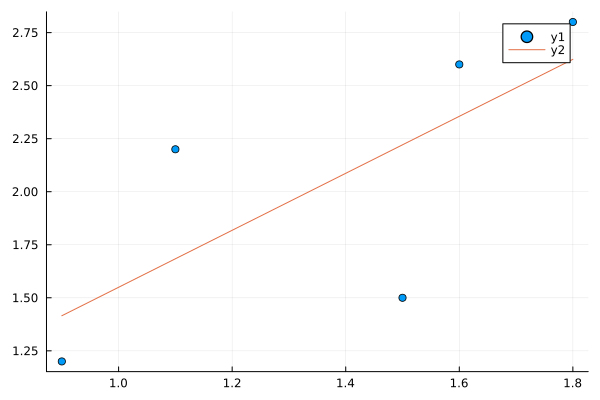

In [7]:
X = [1.0 0.9  ## Regression example
     1.0 1.1
     1.0 1.5
     1.0 1.6
     1.0 1.8]
Y = [1.2
     2.2
     1.5
     2.6
     2.8]
β = (X'X) \ X'Y
using Plots
scatter(X[:,2], Y); plot!([0.9, 1.8], β[1] .+ [0.9, 1.8] .* β[2])

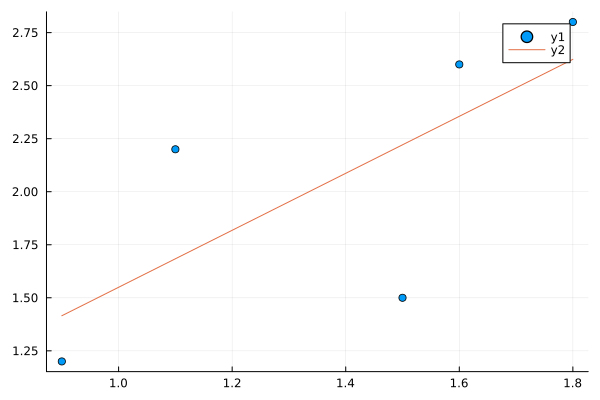

In [8]:
QR = qr(X)
β = QR \ Y

scatter(X[:,2], Y)
plot!([0.9, 1.8], β[1] .+ [0.9, 1.8] .* β[2])

In [9]:
items = [1.0, 2.0, 3.0, 4.0, 5.0]

# Manual iteration
l = Float64[]
for item in items
    append!(l, sin(item))
end

# Broadcast operator
# Since the vectorization is encoded in syntax, 
# it is easy for the compiler to choose efficient instructions
l = broadcast(sin, items)

# Alternative syntax
l = sin.(items)

5-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385

In [10]:
items = [1.0, 2.0, 3.0, 4.0, 5.0]

# Anonymous functions
l = map(x -> sin(x), items)

# threads
l = zeros(5)
Threads.@threads for i = 1:5
    l[i] = sin(items[i])
end

# parallel map
using Distributed

l = pmap(x -> sin(x), items)

5-element Vector{Float64}:
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385

## Ordinary Differential Equations

* By far the best differential equation solving library I've seen
* `DifferentialEquations.jl`
    * Also does many other types of differential equations

$$
\frac{dE_i(t)}{dt} = \mu_i - (\lambda_i + \mu_i + \eta) E_i(t) + \lambda E_i(t)^2 + \frac{\eta}{K-1} \sum_{j \neq i}^K E_j(t)
$$

* `E(t)`: The extinction probability of a lineage at time `t`, under a state-dependent birth-death model
* `λi`: The speciation rate in state `i`
* `µi`: The extinction rate in state `i`
* `η`: The rate of change between state `i` and state `j`

In [23]:
function extinction_prob(dE, E, p, t)
    λ, μ, η, K = p
    for i in 1:K
        dE[i] = μ[i] - (λ[i] + μ[i] + η) * E[i] + λ[i] * E[i] ^2 + (η/(K-1)) * sum(E[j] for j in 1:K if j != i)
    end
end

extinction_prob (generic function with 1 method)

In [24]:
using DifferentialEquations, BenchmarkTools

tspan = (0.0, 10.0)
λ = [0.1, 0.2]
μ = [0.05, 0.15]
η = 0.05
K = 2
p = [λ, μ, η, K]
E0 = [0.0, 0.0]

prob = ODEProblem(extinction_prob, E0, tspan, p)
sol = solve(prob);

@benchmark solve(prob)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  141.400 μs …  14.289 ms  ┊ GC (min … max): 0.00% … 98.34%
 Time  (median):     150.900 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   165.028 μs ± 334.528 μs  ┊ GC (mean ± σ):  4.94% ±  2.41%

    █▇▅▄▁                                                        
  ▂▇█████▆▅▄▃▃▃▄▅▆▇▇▅▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  141 μs           Histogram: frequency by time          223 μs <

 Memory estimate: 82.34 KiB, allocs estimate: 3446.

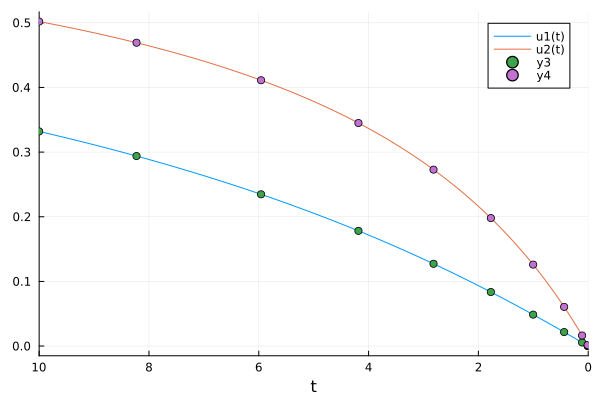

In [26]:
using Plots
plot(sol)
scatter!(sol.t, hcat(sol.u...)', xflip = true)

In [28]:
using ParameterizedFunctions
bisse = @ode_def_bare begin
    dE1 = μ1 - (λ1 + μ1 + η) * E1 + λ1 * E1^2 + η * E2
    dE2 = μ2 - (λ2 + μ2 + η) * E2 + λ2 * E2^2 + η * E1
end λ1 λ2 μ1 μ2 η K

p = [0.1, 0.2, 0.05, 0.15, η, K]

prob2 = ODEProblem(bisse, E0, tspan, p)

sol = solve(prob2)
@benchmark solve(prob2)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  12.400 μs … 93.300 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     15.100 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   16.119 μs ±  3.424 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

     ▃▃█▅                                                      
  ▁▂▄████▇█▅▆▆▄▆▄▅▅▄▅▄▅▄▃▄▃▄▃▂▃▂▃▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  12.4 μs         Histogram: frequency by time        27.7 μs <

 Memory estimate: 20.75 KiB, allocs estimate: 210.

## Benchmarking ODE solvers

adapted from: https://benchmarks.sciml.ai/stable/MultiLanguage/ode_wrapper_packages/

<img src ="figures/benchmark_odesolvers.png">

┌ Warning: RCall.jl: Warning: package 'ape' was built under R version 4.1.2
└ @ RCall C:\Users\bjorn\.julia\packages\RCall\Wyd74\src\io.jl:172


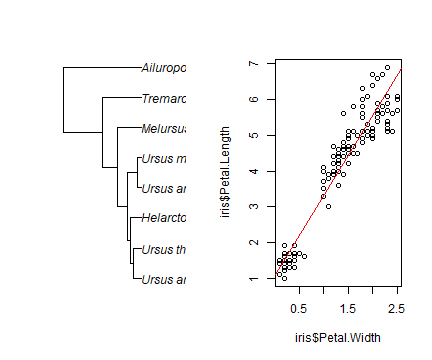

In [29]:
# Interfacing with other languages
# Calling R

using RCall
R"""
library(ape)
library(BDS)

data(bears)
par(mfrow = c(1,2))
plot(bears, cex = 1)
plot(iris$Petal.Width, iris$Petal.Length)
abline(lm(Petal.Length ~ Petal.Width, data = iris), col = "red")
""";

## Differentiable programming

There are many applications where we want to compute derivatives of functions. Here is the finite difference method:

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Finite_difference_method.svg/2560px-Finite_difference_method.svg.png" width = "300">

By the design of the language, Automatic Differentiation is easy to implement, and so people have developed many packages to do so:

* ForwardDiff.jl
* ReverseDiff.jl
* Zygote.jl
* AutoGrad.jl, and many others

source: https://juliadiff.org/

## Forward-mode automatic differentiation using dual numbers

`f(x1, x2) = sin(x1) + x1 * x2`

example from: https://en.wikipedia.org/wiki/Automatic_differentiation

<img src = "https://upload.wikimedia.org/wikipedia/commons/a/a4/ForwardAccumulationAutomaticDifferentiation.png" width = "600">

In [30]:
using ForwardDiff

f(x1, x2) = sin(x1) + x1 * x2
f(x) = f(x[1], x[2])

ForwardDiff.gradient(f, [0.5, 0.5])

2-element Vector{Float64}:
 1.3775825618903728
 0.5

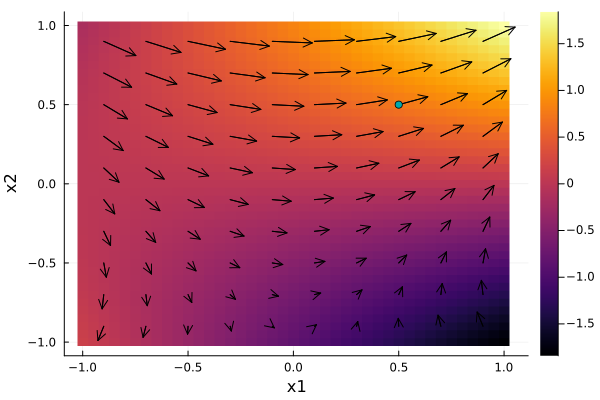

In [31]:
xb = [-1:0.05:1;]
yb = [-1:0.05:1;]
h = zeros(length(xb), length(yb))
for (i, x) in enumerate(xb), (j, y) in enumerate(yb)
    h[i,j] = f(x,y)
end
p1 = surface(xb, yb, f)
p2 = heatmap(xb, yb, h, xlab = "x1", ylab = "x2")
xs = ys = [-0.9:0.2:0.9;] 
for x in xs, y in ys
    d = ForwardDiff.gradient(f, [x, y]) .* 0.1
    quiver!(p2, [x], [y], quiver = ([d[1]], [d[2]]), color = "black")
end
scatter!(p2, [0.5], [0.5], lab = "")
p2

## Hamiltonian Monte Carlo

Consider a simple birth-death model with speciation rate `λ` and extinction rate `µ`

In Hamiltonian Monte Carlo, the proposals are decided using the Hamiltonian dynamics, which takes advantage of the gradient information. In other words, we need to compute `dlogL / dλ`, as well as `dlogL / dµ`, evaluated at the current position `λ` and `µ` in the Monte Carlo simulation.

<p float="left">
  <img align = "left" src = "https://matsen.fredhutch.org/images/hmc-tub.png" width = "400"/>
  <img align = "left" src = "http://www.batisengul.co.uk/post/2021-07-02-intro-to-hmc/HMC_intro_8_1.png" width = "400"/>
</p>

## Constant-rate birth-death model

$$
\begin{aligned}
\frac{dE}{dt} &= \mu - E \cdot (\lambda + \mu) + E^2 \lambda \\
\frac{dM}{dt} &= M \lambda \cdot (E - 1)
\end{aligned}
$$

Initial conditions:
* $E_0$: The probability of not being sampled at the present: `1 - ρ`
* $M_0$: The number of taxa at the present

The likelihood of a reconstructed phylogenetic tree under the constant-rate birth-death model.  
Conditional on that at least two species must have survived until the present:

$$
L = \frac{M^2(t_0)}{M_0^{n+1}} \prod_{i=2}^n \Big [- \frac{dM}{dt} \Big |_{t_i} \Big ]
$$

* $t_i$: the branching times
* $t_0$: the root age


In [32]:
function dEdM(du, u, p, t)
    λ, μ = p
    # dE/dt -- the extinction probability
    du[1] = μ - u[1] * (λ + μ) + λ * u[1]^2
    # dM/dt -- the number of expected lineages in the reconstructed tree
    du[2] = u[2] * λ * (u[1] - 1.0)
end

using Distributions

struct BDconstant <: Distributions.ContinuousUnivariateDistribution
    λ
    μ
end

In [33]:
data = Dict(
    "root_age" => 65.091686,
    "ρ" => 233 / 367,
    "ntip" => 233,
    "branching_times" => [65.091686, 51.870521, 20.922404, 8.520696, 3.644984, 1.449862, 
7.327325, 3.574103, 6.316184, 5.403507, 2.364342, 1.461156, 4.242643, 
16.341328, 4.70362799999999, 1.88177099999999, 9.200565, 2.672476, 
39.482385, 27.516179, 22.034808, 17.17224, 11.199941, 7.60089599999999, 
5.02862699999999, 3.00292999999999, 1.36316299999999, 0.453227999999996, 
13.059529, 6.22906799999999, 5.66244499999999, 5.34290799999999, 
11.892738, 6.376583, 3.07403499999999, 3.75691, 3.684015, 13.616795, 
7.43523599999999, 5.87982599999999, 1.54141899999999, 17.03544, 
11.470706, 7.05337099999999, 4.09978599999999, 2.73741999999999, 
9.40046999999999, 62.600122, 35.182476, 15.300948, 0.257422999999989, 
8.68355399999999, 51.225038, 30.152179, 25.316289, 20.972602, 
11.880745, 8.122417, 3.688446, 3.70051, 10.233816, 6.549583, 
3.789893, 1.755629, 16.47141, 13.302976, 7.32881399999999, 3.085809, 
0.655408999999992, 10.303456, 8.000363, 4.724421, 1.98277, 5.327291, 
2.350548, 2.323717, 20.683502, 12.729944, 0.502262000000002, 
6.926354, 4.527305, 2.947095, 1.758686, 0.793143999999998, 11.286509, 
4.692947, 3.038404, 2.037352, 1.215003, 2.88507, 9.03084399999999, 
2.92191, 25.692876, 23.186567, 7.26239, 3.963779, 0.141183999999996, 
8.420866, 6.824135, 3.943009, 1.76531199999999, 22.028904, 15.787336, 
3.416191, 11.746096, 4.52271499999999, 8.668907, 6.289866, 4.16430099999999, 
2.63152299999999, 1.23779399999999, 18.987614, 18.376967, 11.365038, 
3.70600899999999, 2.079202, 11.200239, 3.43335499999999, 0.510544999999993, 
0.265541999999996, 0.256346999999991, 15.646319, 7.67864699999999, 
6.62526699999999, 3.83733699999999, 12.682661, 7.87820199999999, 
3.27912999999999, 3.30920499999998, 9.81877099999999, 7.67802699999999, 
4.386889, 1.95379199999999, 5.07992299999999, 3.03885799999999, 
1.38319699999999, 32.417031, 19.636876, 15.844633, 6.414492, 
5.067395, 1.953691, 5.87585599999999, 4.01157899999999, 3.53900599999999, 
3.51683199999999, 3.10083699999999, 2.029256, 0.88192699999999, 
4.01896899999999, 1.80652799999999, 0.788241999999997, 18.336764, 
13.60669, 8.89218099999999, 8.88660099999999, 6.92966499999999, 
6.80863799999999, 5.12240199999999, 3.73466199999999, 2.896936, 
0.79484699999999, 0.752116999999984, 0.694338999999985, 6.552103, 
3.807393, 1.894279, 1.588856, 0.220761999999993, 1.550733, 0.527180999999999, 
0.532443000000001, 5.19938499999999, 8.00141999999999, 3.87109199999999, 
2.60968899999999, 1.03784599999999, 3.483864, 11.95809, 5.26084199999999, 
3.49501299999999, 4.31325399999999, 1.75507999999999, 6.03734699999999, 
3.49057099999999, 0.805244999999985, 11.254552, 9.240849, 6.710006, 
5.442184, 1.965892, 2.313097, 0.503238999999994, 2.228041, 1.542749, 
7.491107, 6.256466, 3.580712, 2.648264, 0.135277000000002, 1.653295, 
2.244768, 4.43266199999999, 2.80100299999999, 1.70813799999999, 
0.716124999999991, 1.05538199999999, 2.22959599999999, 0.912747999999993, 
0.269010999999992, 8.282985, 6.749635, 5.725097, 5.180707, 4.912272, 
0.841441000000003, 0.00861799999999846, 4.215321, 3.633333, 2.558834, 
1.240261, 0.786479, 0.77825399999999, 2.953571, 2.322968, 1.708579, 
1.032298, 0.502719999999997, 0.488648999999995, 0.753017999999997, 
0.954774999999998, 1.234458],
)

Dict{String, Any} with 4 entries:
  "ntip"            => 233
  "root_age"        => 65.0917
  "branching_times" => [65.0917, 51.8705, 20.9224, 8.5207, 3.64498, 1.44986, 7.…
  "ρ"               => 0.634877

In [34]:
function Distributions.loglikelihood(model::BDconstant, data)
    E0 = 1.0 - data["ρ"]
    M0 = data["ntip"]
    alg = DifferentialEquations.Tsit5()

    root_age = maximum(data["branching_times"])
    tspan = (0.0, data["root_age"])

    u0 = [E0, M0]
    p = [model.λ, model.μ]
    prob = DifferentialEquations.ODEProblem(dEdM, u0, tspan, p)
    EM = DifferentialEquations.solve(prob, alg, saveat = data["branching_times"], 
                                     isoutofdomain = (u,p,t)->any(x->x<0,u))
    E(t) = EM(t)[1]
    M(t) = EM(t)[2]

    dM(t) = EM(t, Val{1})[2] # The first derivative of M(t)
    n = length(data["branching_times"])

    Mroot = M(root_age)
    if Mroot < 0
        return -Inf
    end
    logL = 2* log(M(root_age)) - (n+1) * log(M0)
    for i in 2:n
        x = -dM(data["branching_times"][i])
        if x < 0
            return -Inf
        end
        logL += log(x)
    end
    return(logL)
end

In [35]:
using Turing

Turing.@model function birthdeath_constant(data)
    μ ~ Distributions.Exponential(0.1)
    d ~ Distributions.Exponential(0.1) # "net-diversification"

    λ = μ + d

    data ~ BDconstant(λ, μ)
end

chain = Turing.sample(birthdeath_constant(data), Turing.NUTS(), 3000; progress=true);

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\bjorn\.julia\packages\AdvancedHMC\iWHPQ\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\bjorn\.julia\packages\AdvancedHMC\iWHPQ\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\bjorn\.julia\packages\AdvancedHMC\iWHPQ\src\hamiltonian.jl:47
┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference C:\Users\bjorn\.julia\packages\Turing\KOb5J\src\inference\hmc.jl:190
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\bjorn\.julia\packages\AdvancedHMC\iWHPQ\sr

In [36]:
chain

Chains MCMC chain (3000×14×1 Array{Float64, 3}):

Iterations        = 1001:1:4000
Number of chains  = 1
Samples per chain = 3000
Wall duration     = 23.28 seconds
Compute duration  = 23.28 seconds
parameters        = μ, d
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           μ    0.2039    0.0443     0.0008    0.0013   1061.4714    1.0024    ⋯
           d    0.0882    0.0164     0.0003    0.0005   1121.0578    1.0029    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

        

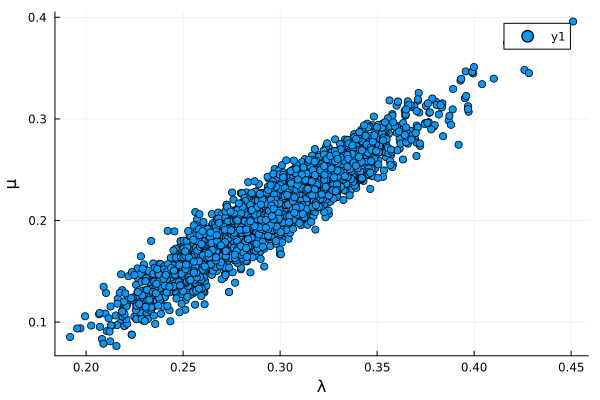

In [37]:
pscatter = scatter(chain[:d] .+ chain[:μ], chain[:μ], xlab = "λ", ylab = "μ")

In [38]:
λb = [0.15:0.01:0.45;]
µb = [0.05:0.01:0.35;]
h = zeros(length(λb), length(μb))
function f2(λ, μ)
    model = BDconstant(λ, μ)
    res = Distributions.loglikelihood(model, data)
end
f2(x) = f2(x[1], x[2])
for (i, λ) in enumerate(λb), (j, μ) in enumerate(μb)
    h[i,j] = f2(λ, µ)
end
p1 = surface(λb, µb, f2, colorbar = :false, xlab = "λ", ylab = "µ", zlab = "logL")

using DataFrames
chaindf = DataFrame(chain)
first_n = 200
x = chaindf[1:first_n, "μ"] + chaindf[1:first_n, "d"]
y = chaindf[1:first_n, "μ"]
z = chaindf[1:first_n, "lp"]#; z[z .< maximum(z) - 2] .= maximum(z) - 2
scatter!(p1, x, y, z, legend = :none)

p2 = heatmap(λb, µb, h, xlab = "λ", ylab = "μ", colorbar = :none)
xs = [0.15:0.03:0.45;]
ys = [0.05:0.03:0.35;]
 
for x in xs, y in ys
    d = ForwardDiff.gradient(f2, [x, y]) .* 0.00002
    quiver!(p2, [x], [y], quiver = ([d[1]], [d[2]]), color = "black")
end

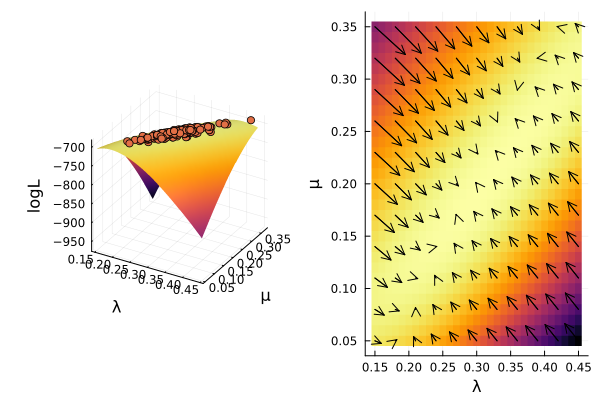

In [39]:
plot(p1, p2)

## Taking a step back

Julia is immensely flexible, but it has some drawbacks

* Small community, difficult to google problems
* Fewer packages than in Python/R/C++
* Debugging/errors: the stacktraces are often uninformative, or too large to interpret
* Documentation, like `?median`, is often lacking since methods are generated 
* Can't compile static binaries
* Some startup-time due to JIT compiler. Time-to-first-plot is longer than in R/Matlab/Python
* 1-based indexing
* Garbage-collected, so not good for real-time applications (games, audio/video processing etc.)

Some other Biology-related projects:
* Phylonetworks: https://crsl4.github.io/PhyloNetworks.jl/stable/
    * Phylogenetic network estimation using quartets, as well as trait evolution on networks
* PANDA.jl: https://github.com/hmorlon/PANDA.jl
    * Diversification analyses

## Lineage-specific birth-death model

<img src="figures/runtime.png">